In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import pandas
import sklearn
from sklearn.neighbors import KNeighborsRegressor
from sklearn import datasets
from sklearn import cross_validation

data = datasets.load_boston()
X = sklearn.preprocessing.scale(data.data)
y = data.target

In [50]:
p_values = np.linspace(1, 10, num=200)
kfold = cross_validation.KFold(
    n=len(X), n_folds=5, shuffle=True, random_state=42)

result = []
for p in p_values:
    knr = KNeighborsRegressor(n_neighbors=5, weights='distance', p=p)
    scores = cross_validation.cross_val_score(knr, X, y,
                scoring='mean_squared_error', cv=kfold)
    score = scores.mean()
    result.append([p, score,])
    
def res_sorter(res): return res[1]

sorted_results = sorted(result, key=res_sorter, reverse=True)[:15]
for p, res in sorted_results:
    print '{p:.2f}: {res:.2f}'.format(p=p, res=res)


1.00: -16.05
1.09: -16.37
1.05: -16.40
1.14: -16.44
1.18: -16.46
1.23: -16.51
1.27: -16.62
1.59: -16.79
1.32: -16.80
1.36: -16.84
1.50: -16.95
1.63: -16.97
1.68: -17.01
1.54: -17.09
1.41: -17.09


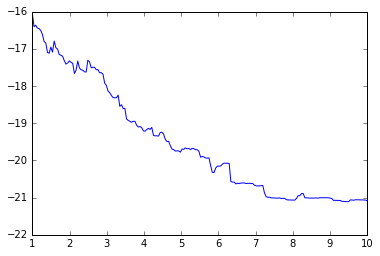

In [59]:
M = np.asarray(result)
plt.plot(M[:, 0], M[:, 1])